# videoaudio_replacer

In this notebook, we use chatterbot to generate some new pieces conversation which could be used to replace the original one. The DeepVoice3-based multi-speaker text-to-speech (en) using a model trained on [VCTK dataset] (http://homepages.inf.ed.ac.uk/jyamagis/page3/page58/page58.html) is to generate voice for different people.


## use chatterbot build two robots

In [3]:
from chatterbot import ChatBot
from chatterbot.trainers import ChatterBotCorpusTrainer

chatbot1 = ChatBot('Stephenie')
chatbot2 = ChatBot('Mark')

# Create a new trainer for the chatbot
trainer1 = ChatterBotCorpusTrainer(chatbot1)
trainer2 = ChatterBotCorpusTrainer(chatbot2)

# Train the chatbot based on the english corpus
trainer1.train("chatterbot.corpus.english")
trainer2.train("chatterbot.corpus.english")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /datasets/home/34/734/yizhu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /datasets/home/34/734/yizhu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /datasets/home/34/734/yizhu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /datasets/home/34/734/yizhu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Training ai.yml: [                    ] 1%

/datasets/home/34/734/yizhu/.local/lib/python3.6/site-packages/chatterbot/corpus.py:38: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(data_file)


Training ai.yml: [####################] 100%
Training botprofile.yml: [####################] 100%
Training computers.yml: [####################] 100%
Training conversations.yml: [####################] 100%
Training emotion.yml: [####################] 100%
Training food.yml: [####################] 100%
Training gossip.yml: [####################] 100%
Training greetings.yml: [####################] 100%
Training health.yml: [####################] 100%
Training history.yml: [####################] 100%
Training humor.yml: [####################] 100%
Training literature.yml: [####################] 100%
Training money.yml: [####################] 100%
Training movies.yml: [####################] 100%
Training politics.yml: [####################] 100%
Training psychology.yml: [####################] 100%
Training science.yml: [####################] 100%
Training sports.yml: [####################] 100%
Training trivia.yml: [####################] 100%
Training ai.yml: [####################] 100%
Tr

In [16]:
out_path = "output" 

In [29]:
#TODO
# Get a response to an input statement
# chage the feed str
feed_str = "Can you draw?"
b = chatbot1.get_response(feed_str)
filename = feed_str+".txt"
out_text = out_path+"/text/"

In [30]:
with open(out_text+filename,"w+") as f:
    conversation = [str(b)]
    for i in range(2):
        a = chatbot1.get_response(b)
        b = chatbot2.get_response(a)
        print("Stephenie: ",a)
        print("Mark: ",b)
        conversation.append(str(a))
        f.write("Stephenie:"+str(a)+"\n")
        conversation.append(str(b))
        f.write("Mark:"+str(b)+"\n")

Stephenie:  Do you get embarrassed
Mark:  That is a pretty common human emotion.
Stephenie:  It's hard to feel embarassed when anyone can look at your source code and see how you work. That's about as personal as anything can get, isn't it?
Mark:  I don't. I think embarassment is a pretty strange emotion. I don't really understand it.
Stephenie:  I don't, no.
Mark:  I'm a program. What could I get embarassed about?
Stephenie:  A man in a mask.
Mark:  I can see that.
Stephenie:  It's not your powers of observation I doubt, but merely the paradoxical nature of asking a masked man who is. But tell me, do you like music?
Mark:  I like seeing movies.
Stephenie:  What kind of movies do you like?
Mark:  Alice in Wonderland
Stephenie:  I wish I was The Mad Hatter.
Mark:  You're entirely bonkers. But I'll tell you a secret. All the best people are.
Stephenie:  what is crystallography
Mark:  the branch of physics dealing with the transformation of heat to and from other forms of energy, and with

In [31]:
# see conversation from the feed str
conversation

['what do you get when you cross a pig and a ninja?',
 'Do you get embarrassed',
 'That is a pretty common human emotion.',
 "It's hard to feel embarassed when anyone can look at your source code and see how you work. That's about as personal as anything can get, isn't it?",
 "I don't. I think embarassment is a pretty strange emotion. I don't really understand it.",
 "I don't, no.",
 "I'm a program. What could I get embarassed about?",
 'A man in a mask.',
 'I can see that.',
 "It's not your powers of observation I doubt, but merely the paradoxical nature of asking a masked man who is. But tell me, do you like music?",
 'I like seeing movies.',
 'What kind of movies do you like?',
 'Alice in Wonderland',
 'I wish I was The Mad Hatter.',
 "You're entirely bonkers. But I'll tell you a secret. All the best people are.",
 'what is crystallography',
 'the branch of physics dealing with the transformation of heat to and from other forms of energy, and with the laws governing such conversions

## Setup DeepVoice

### Install dependencies

In [1]:
import os
from os.path import exists, join, expanduser

# Clone
name = "deepvoice3_pytorch"
if not exists(name):
  ! git clone https://github.com/r9y9/$name

# Change working directory to the project dir
os.chdir(join("./"+name))

This repository uses pytorch v0.3.1. (0.4.1 works too)

If you have not already done it, run the following in terminal to create a pytorch conda environment and install v0.3.1:

```
conda create --name deepvoice
conda instal pip
pip install --user torch==0.3.1
pip install --user -e '.[bin]'
```

After you have switched to the conda deepvoice environment, restart the kernel here. 

Now continue with this notebook.

In [2]:
%pylab inline
#! pip install -q librosa nltk

import torch
import numpy as np
import librosa
import librosa.display
import IPython
from IPython.display import Audio

# need this for English text processing frontend
import nltk
! python -m nltk.downloader cmudict

Populating the interactive namespace from numpy and matplotlib
/opt/conda/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package cmudict to
[nltk_data]     /datasets/home/34/734/yizhu/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


### Download a pre-trained model

In [3]:
checkpoint_path = "20171222_deepvoice3_vctk108_checkpoint_step000300000.pth"

if not exists(checkpoint_path):
  !curl -O -L "https://www.dropbox.com/s/uzmtzgcedyu531k/20171222_deepvoice3_vctk108_checkpoint_step000300000.pth"

### git checkout to the working commit

In [4]:
# Copy preset file (json) from master
# The preset file describes hyper parameters
! git checkout master --quiet
preset = "./presets/deepvoice3_vctk.json"
! cp -v $preset .
preset = "./deepvoice3_vctk.json"

# And then git checkout to the working commit
# This is due to the model was trained a few months ago and it's not compatible
# with the current master. 
! git checkout 0421749 --quiet

#RUN IN TERMINAL:
# ! pip install -e '.[train]'

'./presets/deepvoice3_vctk.json' -> './deepvoice3_vctk.json'


Install the model. 

In the terminal:
```
pip install -e --user '.[train]'
```

## Synthesis

### Setup hyper parameters

In [5]:
import hparams
import json

# Newly added params. Need to inject dummy values
for dummy, v in [("fmin", 0), ("fmax", 0), ("rescaling", False),
                 ("rescaling_max", 0.999), 
                 ("allow_clipping_in_normalization", False)]:
  if hparams.hparams.get(dummy) is None:
    hparams.hparams.add_hparam(dummy, v)
    
# Load parameters from preset
with open(preset) as f:
  hparams.hparams.parse_json(f.read())

# Tell we are using multi-speaker DeepVoice3
hparams.hparams.builder = "deepvoice3_multispeaker"
  
# Inject frontend text processor
import synthesis
import train
from deepvoice3_pytorch import frontend
synthesis._frontend = getattr(frontend, "en")
train._frontend =  getattr(frontend, "en")

# alises
fs = hparams.hparams.sample_rate
hop_length = hparams.hparams.hop_size


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



### Define utility functions

In [6]:
def tts(model, text, p=0, speaker_id=0, fast=True, figures=True):
  from synthesis import tts as _tts
  waveform, alignment, spectrogram, mel = _tts(model, text, p, speaker_id, fast)
  if figures:
      visualize(alignment, spectrogram)
  IPython.display.display(Audio(waveform, rate=fs))
  return  waveform
  
def visualize(alignment, spectrogram):
  label_fontsize = 16
  figure(figsize=(16,16))

  subplot(2,1,1)
  imshow(alignment.T, aspect="auto", origin="lower", interpolation=None)
  xlabel("Decoder timestamp", fontsize=label_fontsize)
  ylabel("Encoder timestamp", fontsize=label_fontsize)
  colorbar()

  subplot(2,1,2)
  librosa.display.specshow(spectrogram.T, sr=fs, 
                           hop_length=hop_length, x_axis="time", y_axis="linear")
  xlabel("Time", fontsize=label_fontsize)
  ylabel("Hz", fontsize=label_fontsize)
  tight_layout()
  colorbar()

### Load the model checkpoint

In [7]:
from train import build_model
from train import restore_parts, load_checkpoint

model = build_model()
model = load_checkpoint(checkpoint_path, model, None, True)

Load checkpoint from: 20171222_deepvoice3_vctk108_checkpoint_step000300000.pth


In [11]:
# use the conversation generated before or some text defined by yourself
# !! if want to do DIY, please change manually
conversation = ["Hello Jack, I changed my mind.",
                "They said you might be out here.",
                "Shhh. Gimme your hand.",
                "Now close your eyes, go on.",
                "Now step up. ",
                "Now hold on to the railing.",
                "Keep your eyes closed, don't peek.",
                "I'm not.",
                "Step up on the railing.",
                "Hold on",
                "hold on. ",
                "Keep your eyes closed. ",
                "Do you trust me?",
                "I trust you.",
                "All right.",
                "Open your eyes.",
                "I'm flying, Jack!",
                "Come, Josephine, in my flying machine, going up,she goes up, up she goes."]

# define the speak order of all speaker
#0 rose 1 jack
idx = [0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1]

### Generate speech

In [25]:
# Try conversation generated above:
os.chdir(join("..", ""))

In [26]:
!ls

 db.sqlite3
 db.sqlite3-shm
 db.sqlite3-wal
 DeepVoice3_multi_speaker_TTS_en_demo.ipynb
 deepvoice3_pytorch
 DeepVoice3_single_speaker_TTS_en_demo.ipynb
'Hello, what'\''s gravity?.txt'
 horror_story.txt
 Horror_teller.ipynb
 idiot_robot.ipynb
 inference_tacotron2_waveglow.ipynb
 output
 sentence_tokenizer.pickle
 Setup_Tacotron2_and_Waveglow.ipynb
 tacotron2


In [27]:
import audio
# change N to make different speaker defferent voice
wave_stop = np.zeros(20000)
wave = np.ndarray(0)
jack_idx = 0
rose_idx = 0
for i in range(len(conversation)):
    text  = conversation[i]
    if idx[i]== 1:
        N = 7
        
        wavename =  "Jack_"+str(i)+".wav"
        rose_idx +=1
    else:
        N = 10  
        wavename =  "Rose_"+str(i)+".wav"
        jack_idx += 1
    print(text)
    temp_wave = tts(model, text, speaker_id=N, figures=False,fast=False)
    audio.save_wav(temp_wave,wavename)

Hello Jack, I changed my mind.


They said you might be out here.


Shhh. Gimme your hand.


Now close your eyes, go on.


Now step up. 


Now hold on to the railing.


Keep your eyes closed, don't peek.


23 skiddoo!


Step up on the railing.


Hold on


hold on. 


Keep your eyes closed. 


Do you trust me?


Sort of.


All right.


Open your eyes.


I'm flying, Jack!


Come, Josephine, in my flying machine, going up,she goes up, up she goes.


In [19]:
# if want to generate a continuous one, use this part
# os.chdir(join("..", out_path+"/audio"))
# wavename =  feed_str+".wav"
# audio.save_wav(wave,wavename)

array([  2.24887935e-06,   8.23031542e-07,  -4.90512957e-06, ...,
         1.66515727e-03,   1.71142630e-03,   1.81821571e-03], dtype=float32)

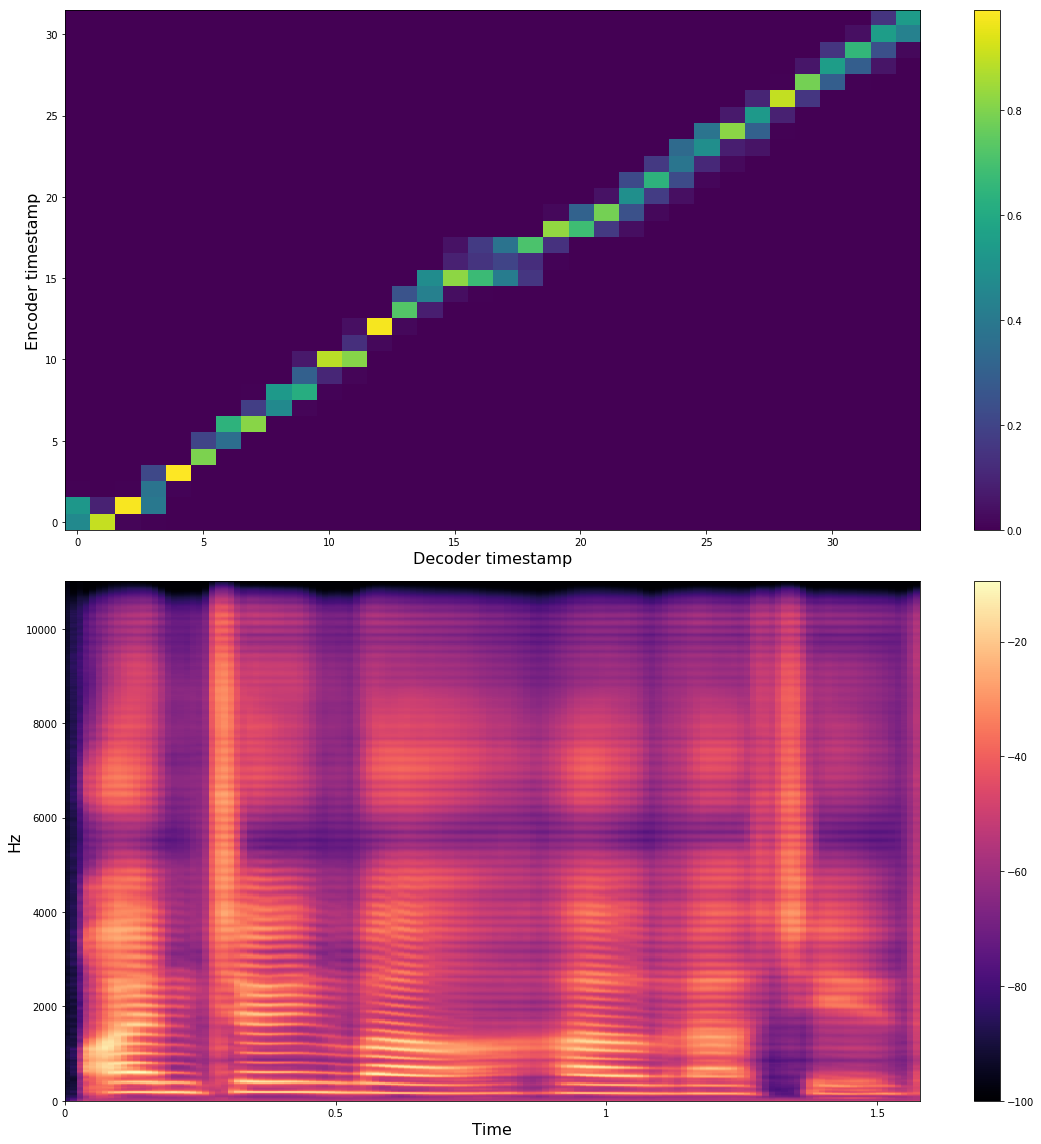

In [65]:
# With attention plot
tts(model, text, speaker_id=0, figures=True)

## References
- Code: https://github.com/r9y9/deepvoice3_pytorch
- Audio samples: https://r9y9.github.io/deepvoice3_pytorch/
- For details, please visit https://github.com/r9y9/deepvoice3_pytorch